# Iris dataset project

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


![Iris](https://miro.medium.com/v2/resize:fit:1400/1*f6KbPXwksAliMIsibFyGJw.png)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Seperate X and Y

In [4]:
X = df.drop(labels=['species'],axis=1)
Y = df[['species']]

In [5]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
Y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [7]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [8]:
mapper = {'setosa':0 , 'versicolor':1, 'virginica':2}
Y['species'] = Y['species'].replace(mapper)

In [9]:
Y.value_counts()

species
0          50
1          50
2          50
Name: count, dtype: int64

## Perform train test split

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.33,random_state=42)

In [11]:
xtrain.shape

(100, 4)

In [12]:
xtest.shape

(50, 4)

### Start buulding model Random forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=21)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=2, random_state=21)

### Predicting Entire data

In [14]:
tr_pred = rfc.predict(xtrain)
ts_pred = rfc.predict(xtest)

In [15]:
# Check accuracy
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)

In [16]:
print('Training Accuracy :',tr_acc)
print('Testing Accuracy  :',ts_acc)

Training Accuracy : 0.94
Testing Accuracy  : 0.98


## Confusion matrix for test data

In [17]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(ytest,ts_pred)
cf

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)

<Axes: >

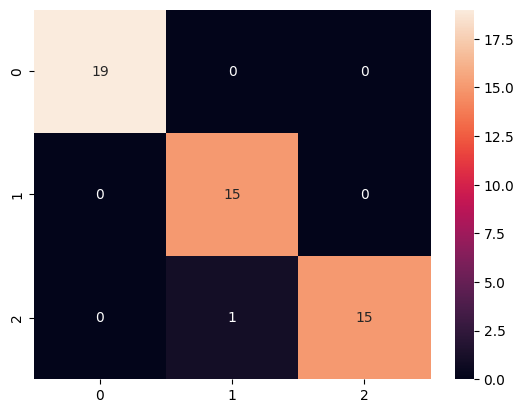

In [18]:
import seaborn as sns
sns.heatmap(cf,annot=True,fmt='d')

In [19]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ts_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### Saving model in pickle file

In [22]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(rfc,f)